In [ ]:
import numpy as np


np.random.seed(42)


A = np.array([
    [1, 2.0],
    [1, 3.0],
    [1, 4.5],
    [1, 5.5]
])


y = np.array([
    [3.1],
    [4.9],
    [8.2],
    [10.1]
])

m = len(y)



theta_ne = np.linalg.inv(A.T @ A) @ A.T @ y
print(f"Theta (Normal Equations):\n{theta_ne}\n")



learning_rate = 0.01
n_iterations = 1000
theta_bgd = np.random.randn(2, 1) 

for iteration in range(n_iterations):
    
    gradients = (1/m) * A.T @ (A @ theta_bgd - y)
    theta_bgd = theta_bgd - learning_rate * gradients

print(f"Theta (Batch Gradient Descent):\n{theta_bgd}\n")






U, S, Vt = np.linalg.svd(A, full_matrices=False)


S_inv = np.diag(1 / S)


A_plus = Vt.T @ S_inv @ U.T
theta_svd = A_plus @ y

print(f"Theta (SVD Method):\n{theta_svd}\n")



print("--- Stability Analysis With Multicollinearity ---")


noise = np.random.rand(m, 1) * 0.0001

A_collinear = np.hstack((A, A[:, [1]] + noise))

print(f"A_collinear shape: {A_collinear.shape}")


try:
    theta_collinear_ne = np.linalg.inv(A_collinear.T @ A_collinear) @ A_collinear.T @ y
    print(f"Theta (Collinear - Normal Eq):\n{theta_collinear_ne}")
except np.linalg.LinAlgError:
    print("Normal Equations failed: Matrix is singular.")


theta_collinear_svd = np.linalg.pinv(A_collinear) @ y
print(f"Theta (Collinear - SVD):\n{theta_collinear_svd}")

Theta (Normal Equations):
[[-1.04137931]
 [ 2.03103448]]

Theta (Batch Gradient Descent):
[[-0.38222724]
 [ 1.87426173]]

Theta (SVD Method):
[[-1.04137931]
 [ 2.03103448]]

--- Stability Analysis With Multicollinearity ---
A_collinear shape: (4, 3)
Theta (Collinear - Normal Eq):
[[ 1.07124800e-01]
 [ 1.04108101e+04]
 [-1.04089714e+04]]
Theta (Collinear - SVD):
[[ 1.07479751e-01]
 [ 1.04104437e+04]
 [-1.04086050e+04]]


/tmp/ipython-input-1002922505.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_mpg = pd.read_csv(url, names=column_names, na_values='?', delim_whitespace=True)


Data ready. m=392 samples.


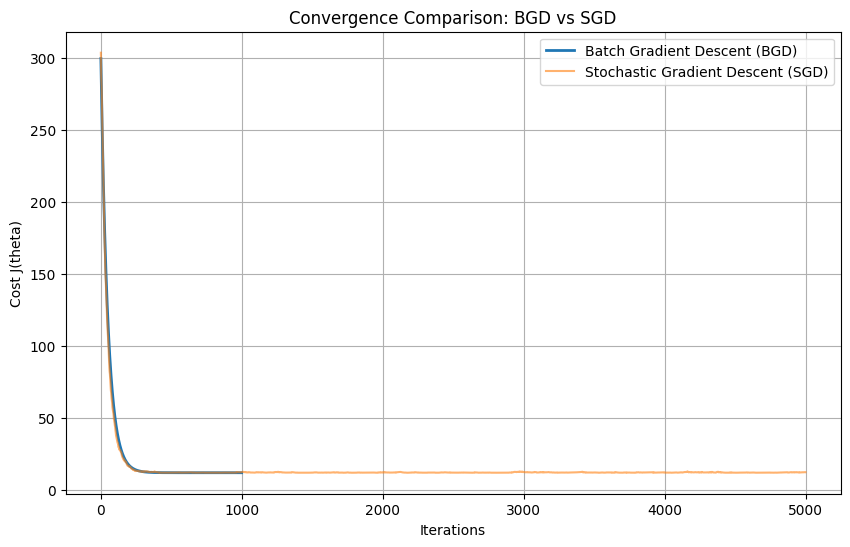

Final BGD Cost: 11.9718
Final SGD Cost: 12.3248


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = [
    'MPG', 'Cylinders', 'Displacement', 'Horsepower',
    'Weight', 'Acceleration', 'ModelYear', 'Origin', 'CarName'
]


data_mpg = pd.read_csv(url, names=column_names, na_values='?', delim_whitespace=True)
data_mpg = data_mpg.dropna(subset=['Horsepower'])
data_mpg['Horsepower'] = data_mpg['Horsepower'].astype(float)







y = data_mpg['MPG'].values.reshape(-1, 1)
x_raw = data_mpg['Horsepower'].values.reshape(-1, 1)



mu = np.mean(x_raw)
sigma = np.std(x_raw)
x_normalized = (x_raw - mu) / sigma



m = len(y)
ones = np.ones((m, 1))
A = np.hstack((ones, x_normalized))

print(f"Data ready. m={m} samples.")




def compute_cost(A, y, theta):
    """Computes Mean Squared Error J(theta)"""
    m = len(y)
    predictions = A @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost


theta_bgd = np.zeros((2, 1)) 
bgd_costs = []
learning_rate_bgd = 0.01
n_iter_bgd = 1000

for i in range(n_iter_bgd):
    
    gradients = (1 / m) * A.T @ (A @ theta_bgd - y)
    theta_bgd = theta_bgd - learning_rate_bgd * gradients

    
    bgd_costs.append(compute_cost(A, y, theta_bgd))


theta_sgd = np.zeros((2, 1)) 
sgd_costs = []
learning_rate_sgd = 0.01 
n_iter_sgd = 5000

np.random.seed(42) 

for i in range(n_iter_sgd):
    
    random_index = np.random.randint(m)

    
    x_i = A[random_index:random_index+1] 
    y_i = y[random_index:random_index+1] 

    
    
    prediction = x_i @ theta_sgd
    gradient = x_i.T @ (prediction - y_i)

    
    theta_sgd = theta_sgd - learning_rate_sgd * gradient

    
    sgd_costs.append(compute_cost(A, y, theta_sgd))




plt.figure(figsize=(10, 6))
plt.plot(bgd_costs, label='Batch Gradient Descent (BGD)', linewidth=2)
plt.plot(sgd_costs, label='Stochastic Gradient Descent (SGD)', alpha=0.6)
plt.xlabel('Iterations')
plt.ylabel('Cost J(theta)')
plt.title('Convergence Comparison: BGD vs SGD')
plt.legend()
plt.grid(True)
plt.show()

print(f"Final BGD Cost: {bgd_costs[-1]:.4f}")
print(f"Final SGD Cost: {sgd_costs[-1]:.4f}")

/tmp/ipython-input-221696734.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_mpg = pd.read_csv(url, names=column_names, na_values='?', delim_whitespace=True)


Learned Theta: [ 23.43052748 -15.25511542   9.59919691]


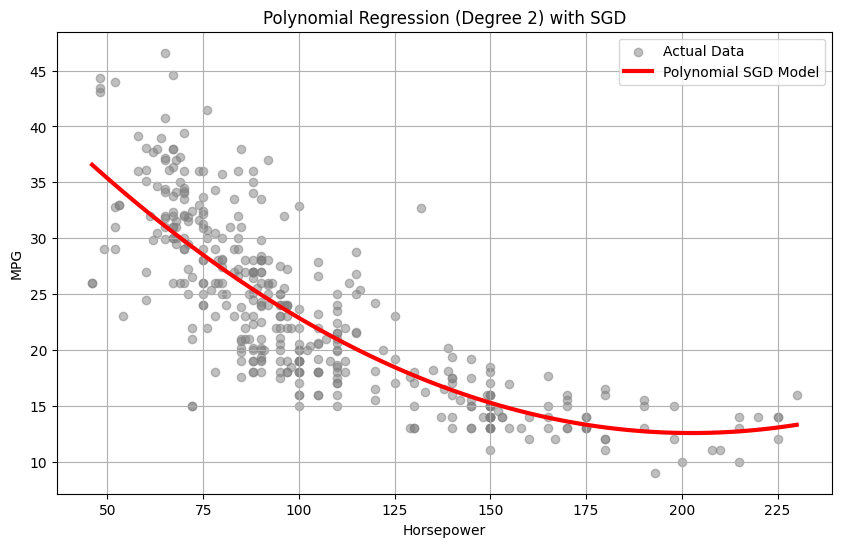

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'ModelYear', 'Origin', 'CarName']

data_mpg = pd.read_csv(url, names=column_names, na_values='?', delim_whitespace=True)
data_mpg = data_mpg.dropna(subset=['Horsepower'])


x_raw = data_mpg['Horsepower'].values.reshape(-1, 1)
y = data_mpg['MPG'].values.reshape(-1, 1)
m = len(y)





x1 = x_raw
x2 = x_raw ** 2



mu1, sigma1 = x1.mean(), x1.std()
mu2, sigma2 = x2.mean(), x2.std()

x1_norm = (x1 - mu1) / sigma1
x2_norm = (x2 - mu2) / sigma2



A_poly = np.hstack((np.ones((m, 1)), x1_norm, x2_norm))


theta = np.random.randn(3, 1) 
learning_rate = 0.01
n_iterations = 10000

for iteration in range(n_iterations):
    
    idx = np.random.randint(m)

    
    x_i = A_poly[idx:idx+1] 
    y_i = y[idx:idx+1]

    
    prediction = x_i @ theta
    error = prediction - y_i

    
    gradient = x_i.T * error
    theta = theta - learning_rate * gradient

print("Learned Theta:", theta.flatten())



plt.figure(figsize=(10, 6))


plt.scatter(x_raw, y, color='gray', alpha=0.5, label='Actual Data')



x_range = np.linspace(x_raw.min(), x_raw.max(), 100).reshape(-1, 1)
x_range_sq = x_range ** 2


x_range_norm = (x_range - mu1) / sigma1
x_range_sq_norm = (x_range_sq - mu2) / sigma2


range_matrix = np.hstack((np.ones((100, 1)), x_range_norm, x_range_sq_norm))


y_pred_smooth = range_matrix @ theta

plt.plot(x_range, y_pred_smooth, color='red', linewidth=3, label='Polynomial SGD Model')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression (Degree 2) with SGD')
plt.legend()
plt.grid(True)
plt.show()